In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
#url information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

554
554
554
554
554
554
554
554
554


In [27]:
# set up lists to hold reponse info (Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph), 
# city name, latitude, longitude, country, and date)
found_cities = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []
country = []
date = []

print("Beginning Data Retrieval")
print("-----------------------------")

#loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        found_cities.append(response["name"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {cities.index(city) + 1} of {len(cities)} | {city}")
    except:
        print(f"City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 611 | cabo san lucas
Processing Record 2 of 611 | tuatapere
Processing Record 3 of 611 | souillac
Processing Record 4 of 611 | mataura
Processing Record 5 of 611 | butaritari
Processing Record 6 of 611 | hami
Processing Record 7 of 611 | new norfolk
Processing Record 8 of 611 | hithadhoo
City not found. Skipping...
Processing Record 10 of 611 | avanigadda
Processing Record 11 of 611 | rikitea
Processing Record 12 of 611 | dumas
Processing Record 13 of 611 | hermanus
Processing Record 14 of 611 | tasiilaq
Processing Record 15 of 611 | albany
Processing Record 16 of 611 | kisangani
Processing Record 17 of 611 | makat
Processing Record 18 of 611 | busselton
Processing Record 19 of 611 | alofi
Processing Record 20 of 611 | longyearbyen
Processing Record 21 of 611 | barrow
Processing Record 22 of 611 | pisco
City not found. Skipping...
Processing Record 24 of 611 | punta arenas
Processing Record 25 of 611 | kyshto

In [38]:
cities_df = pd.DataFrame({"City": found_cities,
              "Lat": latitude,
              "Lng": longitude,
              "Max Temp": max_temp,
              "Humidity": humidity,
              "Cloudiness": cloudiness,
              "Wind Speed": wind_speed,
              "Country": country,
              "Date": date})
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.89,-109.91,90.0,58,5,10.29,MX,1595027061
1,Tuatapere,-46.13,167.68,39.0,83,39,3.00,NZ,1595027191
2,Souillac,-20.52,57.52,69.8,73,40,11.41,MU,1595027191
3,Mataura,-46.19,168.86,39.0,83,0,3.00,NZ,1595027191
4,Butaritari,3.07,172.79,83.3,76,22,15.64,KI,1595027192


In [43]:
humidity_over_100 = cities_df.loc[cities_df["Humidity"] > 100]
humidity_over_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


No cities with humidity greater than 100%

In [45]:
#export dataframe to csv
cities_df.to_csv("Output/city_data.csv", index=False, header=True)

Temperature (F) vs. Latitude

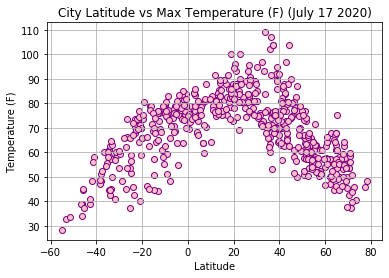

In [82]:
# Plot out temperature(F) versus latitude
x_values_lat = cities_df["Lat"]
y_values_temp = cities_df["Max Temp"]
plt.scatter(x_values_lat, y_values_temp, color="pink", edgecolors="purple")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs Max Temperature (F) (July 17 2020)")
plt.grid()
plt.savefig("Images/temp_lat.png")
plt.show()

City Latitude vs Max Temperature is showing the various maximum temperatures pulled for each city on July 17th 2020. Cities with latitudes farthest away from the 0-20 range tend to have a lower maximum temperature than those with latitudes within the 0-20 range.

Humidity (%) vs. Latitude

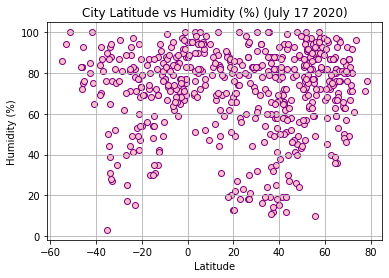

In [83]:
# Plot out humidity(%) versus latitude
x_values_lat = cities_df["Lat"]
y_values_humidity = cities_df["Humidity"]
plt.scatter(x_values_lat, y_values_humidity, color="pink", edgecolors="purple")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%) (July 17 2020)")
plt.grid()
plt.savefig("Images/humidity_lat.png")
plt.show()

City Latitude vs Humidity is showing the humidity percent for each city on July 17th 2020. Humidity percents appear to be somewhat scattered 
with many cities having a humidity percent greater than 50% regardless of latitude.

Cloudiness (%) vs. Latitude

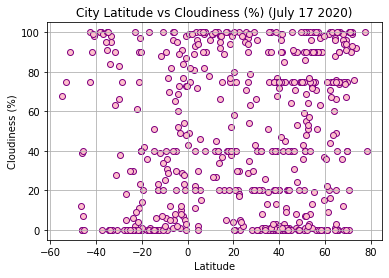

In [84]:
# Plot out cloudiness(%) versus latitude
x_values_lat = cities_df["Lat"]
y_values_cloud = cities_df["Cloudiness"]
plt.scatter(x_values_lat, y_values_cloud, color="pink", edgecolors="purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%) (July 17 2020)")
plt.grid()
plt.savefig("Images/cloudiness_lat.png")
plt.show()

City Latitude vs Cloudiness is showing the percent cloudiness for each city on July 17th 2020. Cloudiness does not appear to be correlated 
with city latitudes.

Wind Speed (mph) vs. Latitude

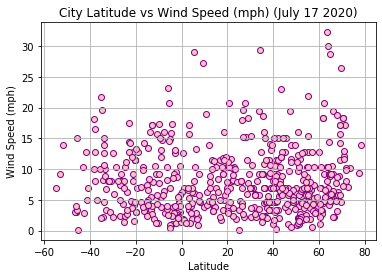

In [85]:
# Plot out wind speed (mph) versus latitude
x_values_lat = cities_df["Lat"]
y_values_wind = cities_df["Wind Speed"]
plt.scatter(x_values_lat, y_values_wind, color="pink", edgecolors="purple")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (mph) (July 17 2020)")
plt.grid()
plt.savefig("Images/windspeed_lat.png")
plt.show()

City Latitude vs Wind Speed is showing the wind speed for each city on July 17th 2020. Many cities appear to have wind speeds under 15 mph 
regardless of latitude.

In [183]:
# OPTIONAL: Create a function to create Linear Regression plot
def linear_regress_north(x_values, y_values, annotate_x, annotate_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, color="pink", edgecolors="purple")
    plt.plot(x_values, regress_values,"r-", color="teal")
    plt.annotate(line_eq,(annotate_x, annotate_y),fontsize=15,color="teal")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue**2}")

def linear_regress_south(x_values, y_values, annotate_x, annotate_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, color="teal")
    plt.plot(x_values, regress_values,"r-", color="purple")
    plt.annotate(line_eq,(annotate_x, annotate_y),fontsize=15,color="purple")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue**2}")

In [143]:
north_hemi_df = cities_df.loc[cities_df["Lat"] >= 0]
south_hemi_df = cities_df.loc[cities_df["Lat"] < 0]

Northern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.46865541900340396


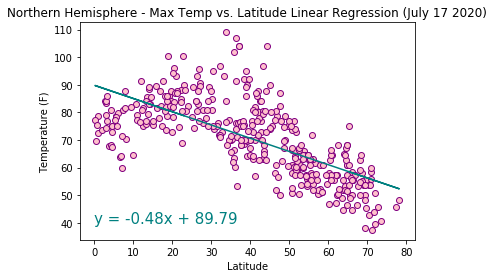

In [197]:
x_values_lat_north = north_hemi_df["Lat"]
y_values_temp_north = north_hemi_df["Max Temp"]
linear_regress_north(x_values_lat_north, y_values_temp_north, 0, 40)
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (July 17 2020)")
plt.savefig("Images/north_temp_lat.png")
plt.show()

Southern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.5745676252353328


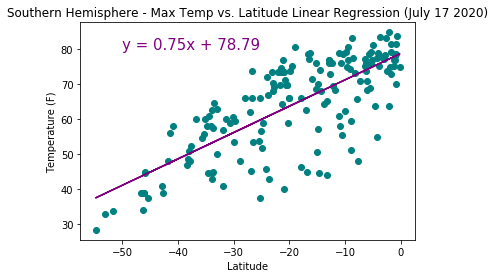

In [198]:
x_values_lat_south = south_hemi_df["Lat"]
y_values_temp_south = south_hemi_df["Max Temp"]
linear_regress_south(x_values_lat_south, y_values_temp_south, -50, 80)
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (July 17 2020)")
plt.savefig("Images/south_temp_lat.png")
plt.show()

The Northern Hemisphere - Max Temp vs Latitude shows a downward trend; as latitude increases, the maximum temperature tends to be lower. The
Southern Hemisphere - Max Temp vs Latitude shows an upward trend; as latitude increases, the maximum temperature tends to increase as well.
This shows the tendency for cities located closer to the equator to have higher temperatures than those farther away.

Northern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.00010422480055451176


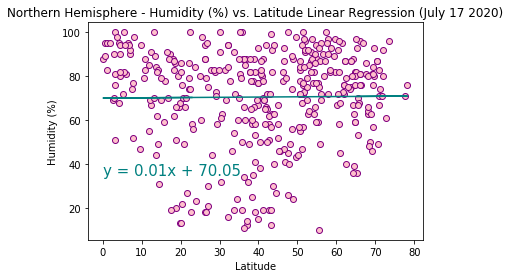

In [199]:
x_values_lat_north = north_hemi_df["Lat"]
y_values_humid_north = north_hemi_df["Humidity"]
linear_regress_north(x_values_lat_north, y_values_humid_north,0, 35)
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (July 17 2020)")
plt.savefig("Images/north_humid_lat.png")
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.004760973784091661


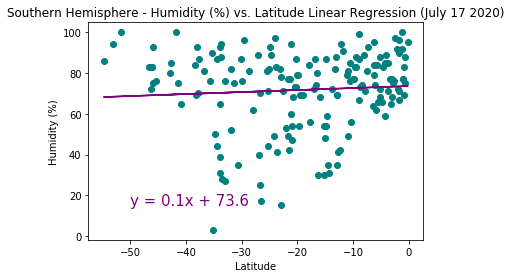

In [200]:
x_values_lat_south = south_hemi_df["Lat"]
y_values_humid_south = south_hemi_df["Humidity"]
linear_regress_south(x_values_lat_south, y_values_humid_south, -50, 15)
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (July 17 2020)")
plt.savefig("Images/south_humid_lat.png")
plt.show()

Both linear regression lines for Humidity vs Latitude for northern and southern hemispheres are close to parallel with the x-axis. Both have very small slopes which means that there is a very weak relationship between humidity and latitude based on data obtained from a single day.

Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.0001376773760135223


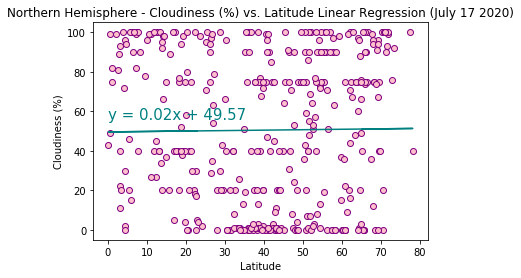

In [201]:
x_values_lat_north = north_hemi_df["Lat"]
y_values_cloud_north = north_hemi_df["Cloudiness"]
linear_regress_north(x_values_lat_north, y_values_cloud_north, 0, 56)
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (July 17 2020)")
plt.savefig("Images/north_cloud_lat.png")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.010911064055820055


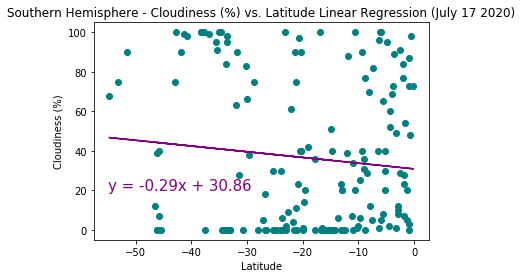

In [202]:
x_values_lat_south = south_hemi_df["Lat"]
y_values_cloud_south = south_hemi_df["Cloudiness"]
linear_regress_south(x_values_lat_south, y_values_cloud_south, -55, 20)
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (July 17 2020)")
plt.savefig("Images/south_cloud_lat.png")
plt.show()

The southern hemisphere appears to show a somewhat stronger relationshop between cloudiness and latitude than the northern hemisphere. The southern hemisphere shows that cloudiness tends to decrease as latitude increases closer to the equator although the northern hemisphere shows an even weaker relationship between cloudiness and latitude. Data would need to be collected over the course of more than one day to determine if a stronger relationship can be determined.

Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 0.010066707646266894


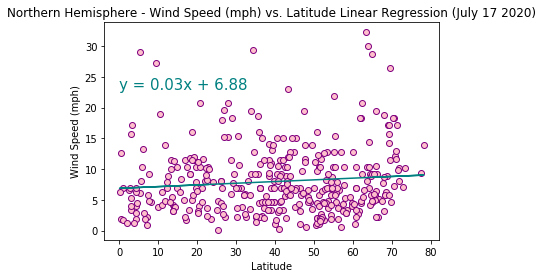

In [203]:
x_values_lat_north = north_hemi_df["Lat"]
y_values_wind_north = north_hemi_df["Wind Speed"]
linear_regress_north(x_values_lat_north, y_values_wind_north, 0, 23)
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (July 17 2020)")
plt.savefig("Images/north_wind_lat.png")
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 0.006563231147027491


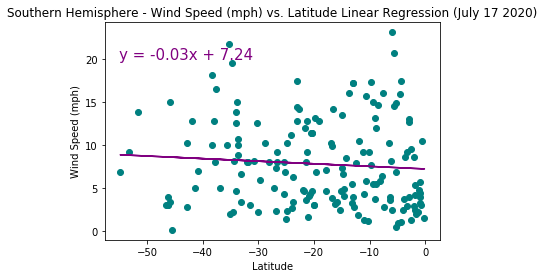

In [204]:
x_values_lat_south = south_hemi_df["Lat"]
y_values_wind_south = south_hemi_df["Wind Speed"]
linear_regress_south(x_values_lat_south, y_values_wind_south, -55, 20)
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (July 17 2020)")
plt.savefig("Images/south_wind_lat.png")
plt.show()

Both northern and southern hemispheres show a weak correlation between wind speed and latitude. The southern hemisphere shows wind speed has a downward trend with latitudes closer to the equator having lower wind speeds. The northern hemisphere has a very similar trend (shown in part by the slope having the same value as the southern hemisphere but negative) with wind speed tending to decrease at latitudes closer to the equator.